In [1]:
import pandas as pd
import numpy as np
import os

import pandas as pd
df = pd.read_csv("csvs/dataICdistribution.csv", index_col=0)
df.head()

,K,mag,filename,tmax,tinstability,Eerr1,Eerrf,tinstability_index,e1b,erms1b,...,phi3bodyfbcd,phi3bodylibampfbcd,phi3bodyfcde,phi3bodylibampfcde,phi3bodyfdef,phi3bodylibampfdef,phi3bodyfefg,phi3bodylibampfefg,phi3bodyffgh,phi3bodylibampffgh
0,125.210,0.139820,IC0K1.2521e+02mag1.3982e-01.bin,50000000.0,5.000000e+07,5.822356e-08,4.967208e-07,NaN,0.002367,0.001243,...,180.382744,355.617873,179.610042,56.246368,158.052173,49.769303,72.373749,35.045178,184.842226,51.288011
2,74.471,0.001196,IC2K7.4471e+01mag1.1961e-03.bin,50000000.0,5.000000e+07,3.297564e-07,2.164101e-07,NaN,0.000855,0.000229,...,-169.450790,10.080476,-58.951869,1.184578,153.517688,2.093642,76.372666,1.322239,-176.726361,1.274744
4,859.130,0.043822,IC4K8.5913e+02mag4.3822e-02.bin,50000000.0,5.000000e+07,3.569262e-08,5.113791e-04,NaN,0.001009,0.000329,...,169.973459,357.113861,179.886173,358.636690,0.580709,357.695611,4.291293,327.054454,173.281072,354.739737
6,610.550,0.009907,IC6K6.1055e+02mag9.9069e-03.bin,50000000.0,2.869029e+06,2.234090e-06,8.162635e-01,2869.0,0.006052,0.003035,...,180.274521,358.640732,-2.571699,358.912876,1.139761,356.951838,185.133703,358.359138,182.348677,358.503196
7,14.211,0.218653,IC7K1.4211e+01mag2.1865e-01.bin,50000000.0,5.000000e+07,3.204928e-08,1.226401e-03,NaN,0.029537,0.015570,...,185.006130,357.093692,181.962024,356.578029,181.513752,348.597249,-0.887433,316.885252,2.258131,359.470056


In [2]:
N=df.shape[0]
ts = np.sort(df['tinstability'])
cumsum = np.zeros(N)
tot = 0.
for i,t in enumerate(ts):
    if t < 5.e6:
        tot += 1.
    if t > 5.e6 and t < 5.e7:
        tot += N/21
    cumsum[i] = tot/N

In [3]:
dfnr = pd.read_csv('csvs/datanonresupdated.csv', index_col=0)
dfnr.head()
Nnr=dfnr.shape[0]
tsnr = np.sort(dfnr['tinstability'])
cumsumnr = np.zeros(Nnr)
tot = 0.
for i,t in enumerate(tsnr):
    if t < 5.e6:
        tot += 1.
    cumsumnr[i] = tot/N

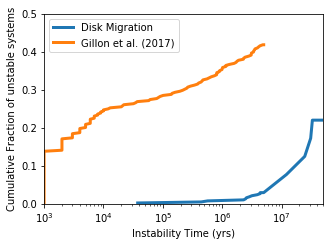

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('paper')

fig, ax = plt.subplots(figsize=(5,3.5))
ax.plot(ts,cumsum, lw=3, label='Disk Migration')
ax.plot(tsnr, cumsumnr, lw=3,label='Gillon et al. (2017)')
ax.set_xscale('log')
ax.set_ylim([0,0.5])
ax.set_xlim([1e3,5e7])
ax.set_xlabel('Instability Time (yrs)')
ax.set_ylabel('Cumulative Fraction of unstable systems')
ax.legend()
fig.savefig('instabilitytimes.pdf', bbox_inches='tight')